In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [8]:
df.sample()['clean_comment'].values

array([' with bulk traffic now diverting through mumbai the airspace over the city getting congested and this overload nearly resulted mid air crash last week air france boeing 777 and etihad airbus 320 came dangerously close over the arabian sea before the anti collision warnings came and one the aircraft swung away not good all because pak army way too trigger happy'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [10]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [11]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [13]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [14]:
df.dropna(inplace = True)

In [15]:
df.duplicated().sum()

350

In [16]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [20]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [22]:
df['clean_comment'] = df['clean_comment'].str.lower()

In [23]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [26]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [25]:
df['clean_comment'] = df['clean_comment'].str.strip()

In [28]:
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

In [30]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [31]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)

### EDA


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

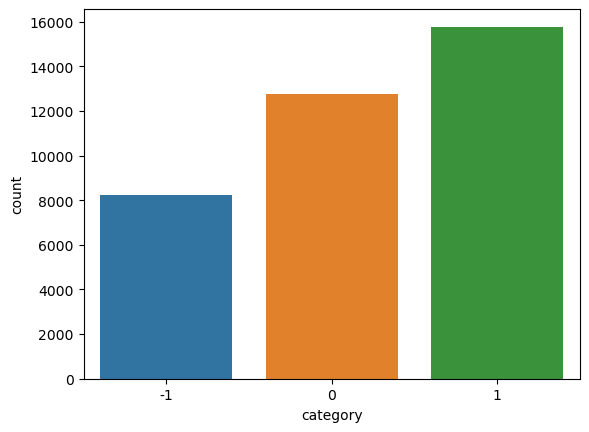

In [33]:
sns.countplot(data = df, x= 'category')

In [38]:
df['category'].value_counts(normalize = True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [39]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [40]:
df['clean_comment'].apply(lambda x: len(x.split()))

0         39
1        196
2         86
3         29
4        112
        ... 
37244      1
37245     19
37246      6
37247      2
37248      6
Name: clean_comment, Length: 36793, dtype: int64

In [41]:
df.sample(5)

,clean_comment,category,word_count
19942,quoting facts get ready for another defamation...,1,8
2348,the biggest problem with hindi any regional la...,1,53
30906,into the modi verse,0,4
8049,gujarat not the list,0,4
12173,fyi modi separated from his wife,0,6
